In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from numpy import corrcoef
import operator
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif

In [2]:
df = pd.read_csv('kidney_disease.csv', index_col = 'id')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df = df.dropna()

In [4]:
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = LabelEncoder().fit_transform(df[col])

In [5]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11,42,14,1,0,0,1,1,1,0
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,8,11,12,1,1,0,1,0,1,0
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,11,25,13,1,1,0,1,1,0,0
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,0,8,2,1,1,1,1,1,0,0
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,4,63,7,1,1,1,1,1,1,0


In [6]:
x = df.drop( ["classification"], axis = 1)
y = df["classification"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [8]:
pearsoncorr = x_train.corr(method='pearson')
pearsoncorr

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
age,1.000000,0.109295,-0.290519,0.279584,0.183643,-0.124476,-0.215410,0.181567,0.076546,0.291380,...,-0.254536,-0.252257,-0.154552,-0.268235,0.375314,0.329446,0.275752,0.166290,0.235697,0.149020
bp,0.109295,1.000000,-0.187129,0.347613,0.241482,-0.450635,-0.233884,0.210948,0.150076,0.195698,...,-0.294100,-0.325367,-0.036168,-0.273894,0.365249,0.261685,0.207728,0.215219,0.175045,0.293246
sg,-0.290519,-0.187129,1.000000,-0.704776,-0.398690,0.500203,0.618106,-0.455865,-0.462125,-0.505952,...,0.696593,0.632477,0.337111,0.643362,-0.635805,-0.645687,-0.346594,-0.563554,-0.664188,-0.425800
al,0.279584,0.347613,-0.704776,1.000000,0.510419,-0.480373,-0.781957,0.500721,0.471144,0.509630,...,-0.801721,-0.723767,-0.281253,-0.681883,0.830479,0.691247,0.378749,0.613963,0.646156,0.563571
su,0.183643,0.241482,-0.398690,0.510419,1.000000,-0.189754,-0.312740,0.200037,0.395743,0.675429,...,-0.372660,-0.362627,-0.069702,-0.368466,0.524469,0.566848,0.356542,0.238049,0.401951,0.172360
rbc,-0.124476,-0.450635,0.500203,-0.480373,-0.189754,1.000000,0.493075,-0.214682,-0.306294,-0.451315,...,0.498201,0.500682,0.161897,0.402297,-0.439429,-0.508200,-0.306294,-0.410205,-0.270135,-0.259938
pc,-0.215410,-0.233884,0.618106,-0.781957,-0.312740,0.493075,1.000000,-0.584327,-0.441741,-0.409901,...,0.751466,0.671155,0.145889,0.672431,-0.673518,-0.620223,-0.441741,-0.536213,-0.593084,-0.583986
pcc,0.181567,0.210948,-0.455865,0.500721,0.200037,-0.214682,-0.584327,1.000000,0.359030,0.307425,...,-0.535853,-0.422784,-0.221565,-0.509592,0.464908,0.324592,0.469907,0.485662,0.331133,0.487508
ba,0.076546,0.150076,-0.462125,0.471144,0.395743,-0.306294,-0.441741,0.359030,1.000000,0.291921,...,-0.386350,-0.380281,-0.249122,-0.308202,0.244237,0.371012,0.332627,0.172736,0.358758,0.115072
bgr,0.291380,0.195698,-0.505952,0.509630,0.675429,-0.451315,-0.409901,0.307425,0.291921,1.000000,...,-0.442071,-0.434665,-0.182808,-0.418745,0.521247,0.654277,0.335210,0.380837,0.356487,0.143257


<AxesSubplot:>

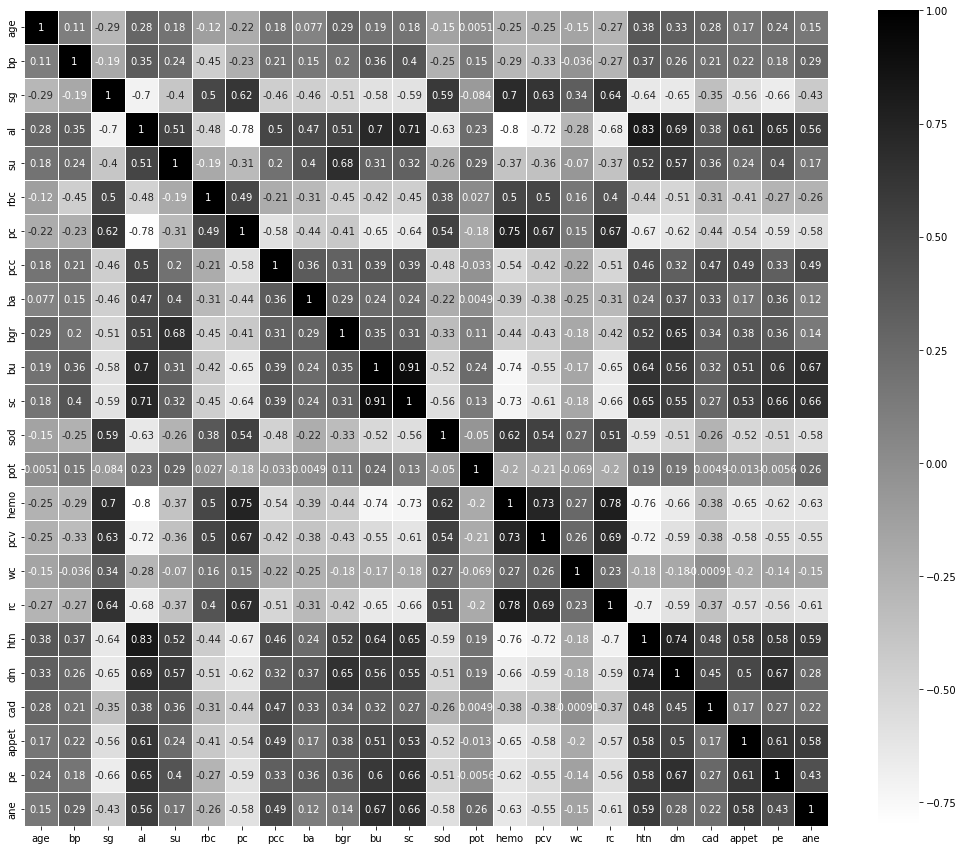

In [9]:
plt.figure(figsize = (18,15))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='binary',
            annot=True,
            linewidth=0.5)

In [10]:
#Selecting highly correlated features using Pearsons Correlation
def correlation(threshold):
    col_corr = set()
    corr_matrix = pearsoncorr
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold):
            #if (corr_matrix.iloc[i, j] > threshold):
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [11]:
#select features with 75% threshold
corr_features = correlation(0.75)
corr_features

{'hemo', 'htn', 'rc', 'sc'}

In [12]:
#Correlation matrix and upper triangular matrix
cm = pearsoncorr.abs()
ut = cm.where(np.triu(np.ones(cm.shape),k=1).astype(bool))
todrop = {column for column in ut.columns if any(ut[column] > 0.75)}
todrop

{'hemo', 'htn', 'pc', 'rc', 'sc'}

In [13]:
#MRMr implementation

class MRMR:
    def __init__(self, df, target_name, difference_or_quotient='difference'):
        self.df = df
        self.idxs_by_class = [df[df[target_name] == v].index for v in df[target_name].unique()]
        self.features = [col for col in df.columns if col != target_name]
        self.ranked_features = []
        self.feature_relevance = {feat_name: self.calc_feature_relevance(self.df[feat_name]) for feat_name in
                                  self.features}
        self.use_difference = difference_or_quotient == 'difference'
        self.calculated_correlations = {}

    def calc_feature_relevance(self, feature):
        groups = [feature[class_idxs].values for class_idxs in self.idxs_by_class]
        return f_oneway(*groups).statistic

    def calc_feature_redundancy(self, feature):
        redundancy = 0
        for feat in self.ranked_features:
            if (feat, feature) not in self.calculated_correlations:
                self.calculated_correlations[(feat, feature)] = abs(corrcoef(self.df[feature], self.df[feat])[1, 0])
                self.calculated_correlations[(feature, feat)] = abs(corrcoef(self.df[feature], self.df[feat])[1, 0])

            redundancy += self.calculated_correlations[(feat, feature)]
        return redundancy

    def rank_features(self):
        most_important_feature = max(self.feature_relevance.items(), key=operator.itemgetter(1))[0]
        self.ranked_features.append(most_important_feature)

        while len(self.ranked_features) != len(self.features):
            top_importance = 0
            most_important_feature = None
            for feat in self.features:
                if feat in self.ranked_features:
                    continue

                feature_redundancy = self.calc_feature_redundancy(feat)
                feature_relevance = self.feature_relevance[feat]
                if self.use_difference:
                    importance = feature_relevance - feature_redundancy
                else:
                    importance = feature_relevance / feature_redundancy

                if importance > top_importance:
                    top_importance = importance
                    most_important_feature = feat

            self.ranked_features.append(most_important_feature)

        return self.ranked_features

In [14]:
different_ranking_methods = {}

In [15]:
f_scores = f_classif(x, y)[0]
f_scores = pd.Series(f_scores, index=[col for col in df.columns if col!='classification']).sort_values(ascending=False)
different_ranking_methods['anova_f_statistic'] = f_scores.index

In [16]:
mrmr = MRMR(df, 'classification')
different_ranking_methods['mrmr_difference_based'] = mrmr.rank_features()

In [17]:
mrmr = MRMR(df, 'classification', difference_or_quotient='quotient')
different_ranking_methods['mrmr_quotient_based'] = mrmr.rank_features()

In [18]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
rfc_features = pd.Series(model.feature_importances_, index=mrmr.features).sort_values(ascending=False)
different_ranking_methods['random_forest_feature_ranking'] = rfc_features.index

In [19]:
pd.DataFrame(different_ranking_methods)

,anova_f_statistic,mrmr_difference_based,mrmr_quotient_based,random_forest_feature_ranking
0,al,al,al,hemo
1,htn,htn,htn,pcv
2,hemo,hemo,hemo,al
3,pcv,pcv,sg,sc
4,sg,sg,pcv,rc
5,pc,pc,pc,bu
6,dm,dm,dm,htn
7,rc,rc,rc,sg
8,sc,sc,sc,pc
9,bu,bu,bu,dm


In [20]:
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=x, y=y, K=10)
print(selected_features)
print(corr_features)
print(todrop)

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 143.26it/s]

['al', 'htn', 'hemo', 'sg', 'pcv', 'pc', 'dm', 'rc', 'sc', 'bu']
{'hemo', 'htn', 'rc', 'sc'}
{'rc', 'hemo', 'htn', 'sc', 'pc'}


In [21]:
selected_features = [i for i in selected_features if i not in corr_features.union(todrop)]
selected_features

['al', 'sg', 'pcv', 'dm', 'bu']

In [22]:
#https://github.com/smazzanti/mrmr
#https://elliot-weissberg.medium.com/another-feature-selection-algorithm-mrmr-3827b6b19e33

Weight for the classification accuracy [0-1]: .75
Enter the percentage of data wanted for valdiation [0, 100]: 20

                          Iteration - 1


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9140625
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.9140625, Number of Features: 6
Particle 2 - Fitness: 0.90625, Number of Features: 9
Particle 3 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 4 - Fitness: 0.8776041666666666, Number of Features: 5
Particle 5 - Fitness: 0.875, Number of Features: 12
Particle 6 - Fitness: 0.8671875, Number of Features: 6
Particle 7 - Fitness: 0.859375, Number of Features: 9
Particle 8 - Fitness: 0.859375, Number of Features: 9
Particle 9 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 10 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 11 - Fitness: 0.84375, Number of Features: 6
Particle 12 - Fitness: 0.8359375, Number of Features: 9
Parti


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8932291666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 2 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 3 - Fitness: 0.859375, Number of Features: 9
Particle 4 - Fitness: 0.859375, Number of Features: 9
Particle 5 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 6 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 7 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 8 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 9 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 10 - Fitness: 0.8359375, Number of Features: 9
Particle 11 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 12 - Fitness: 0.828125, Number of Features: 12
Particle 13 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 14 - Fitness: 0.8151041666666666


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.890625
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.890625, Number of Features: 6
Particle 2 - Fitness: 0.890625, Number of Features: 6
Particle 3 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 4 - Fitness: 0.859375, Number of Features: 9
Particle 5 - Fitness: 0.8515625, Number of Features: 12
Particle 6 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 7 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 8 - Fitness: 0.8359375, Number of Features: 9
Particle 9 - Fitness: 0.8333333333333334, Number of Features: 7
Particle 10 - Fitness: 0.828125, Number of Features: 12
Particle 11 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 12 - Fitness: 0.8229166666666666, Number of Features: 8
Particle 13 - Fitness: 0.8229166666666666, Number of Features: 8
Particle 14 - Fitness: 0.796875, Number of Features: 15
Particle 15 - F


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9036458333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 2 - Fitness: 0.9010416666666666, Number of Features: 5
Particle 3 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 4 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 5 - Fitness: 0.8671875, Number of Features: 6
Particle 6 - Fitness: 0.859375, Number of Features: 9
Particle 7 - Fitness: 0.859375, Number of Features: 9
Particle 8 - Fitness: 0.859375, Number of Features: 9
Particle 9 - Fitness: 0.8359375, Number of Features: 9
Particle 10 - Fitness: 0.828125, Number of Features: 12
Particle 11 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 12 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 13 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 14 - Fitness: 0.8020833333333334, Number of Features:


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.890625
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.890625, Number of Features: 6
Particle 2 - Fitness: 0.890625, Number of Features: 6
Particle 3 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 4 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 5 - Fitness: 0.859375, Number of Features: 9
Particle 6 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 7 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 8 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 9 - Fitness: 0.828125, Number of Features: 12
Particle 10 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 11 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 12 - Fitness: 0.8229166666666666, Number of Features: 8
Particle 13 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 14 - Fitness: 0.8177083333333334, Number of


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8802083333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 2 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 3 - Fitness: 0.8671875, Number of Features: 6
Particle 4 - Fitness: 0.859375, Number of Features: 9
Particle 5 - Fitness: 0.8515625, Number of Features: 12
Particle 6 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 7 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 8 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 9 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 10 - Fitness: 0.8359375, Number of Features: 9
Particle 11 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 12 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 13 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 14 - Fitness: 0.8046875, Num


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8932291666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 2 - Fitness: 0.875, Number of Features: 12
Particle 3 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 4 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 5 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 6 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 7 - Fitness: 0.8359375, Number of Features: 9
Particle 8 - Fitness: 0.828125, Number of Features: 12
Particle 9 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 10 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 11 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 12 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 13 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 14 - Fitness: 0.81770


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8697916666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 2 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 3 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 4 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 5 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 6 - Fitness: 0.8359375, Number of Features: 9
Particle 7 - Fitness: 0.828125, Number of Features: 12
Particle 8 - Fitness: 0.828125, Number of Features: 12
Particle 9 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 10 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 11 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 12 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 13 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 14 - Fitness: 0.804


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8802083333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 2 - Fitness: 0.859375, Number of Features: 9
Particle 3 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 4 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 5 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 6 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 7 - Fitness: 0.8359375, Number of Features: 9
Particle 8 - Fitness: 0.8359375, Number of Features: 9
Particle 9 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 10 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 11 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 12 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 13 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 14 - Fitness: 0.80


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8802083333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 2 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 3 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 4 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 5 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 6 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 7 - Fitness: 0.8359375, Number of Features: 9
Particle 8 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 9 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 10 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 11 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 12 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 13 - Fitness: 0.8072916666666666, Number of Features: 14
Partic


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8723958333333334
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 2 - Fitness: 0.8515625, Number of Features: 12
Particle 3 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 4 - Fitness: 0.8359375, Number of Features: 9
Particle 5 - Fitness: 0.828125, Number of Features: 12
Particle 6 - Fitness: 0.828125, Number of Features: 12
Particle 7 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 8 - Fitness: 0.8229166666666666, Number of Features: 8
Particle 9 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 10 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 11 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 12 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 13 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 14 - Fitness: 0.807291666


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9140625
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.9140625, Number of Features: 6
Particle 2 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 3 - Fitness: 0.859375, Number of Features: 9
Particle 4 - Fitness: 0.8515625, Number of Features: 12
Particle 5 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 6 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 7 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 8 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 9 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 10 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 11 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 12 - Fitness: 0.796875, Number of Features: 15
Particle 13 - Fitness: 0.7942708333333334, Number of Features: 13
Particle 14 - Fitness: 0.7942708333333334, Nu


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8489583333333334
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 2 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 3 - Fitness: 0.8359375, Number of Features: 9
Particle 4 - Fitness: 0.8359375, Number of Features: 9
Particle 5 - Fitness: 0.828125, Number of Features: 12
Particle 6 - Fitness: 0.828125, Number of Features: 12
Particle 7 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 8 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 9 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 10 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 11 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 12 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 13 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 14 - Fitness: 0.815104166


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8463541666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 2 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 3 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 4 - Fitness: 0.8359375, Number of Features: 9
Particle 5 - Fitness: 0.8359375, Number of Features: 9
Particle 6 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 7 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 8 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 9 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 10 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 11 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 12 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 13 - Fitness: 0.8046875, Number of Features: 12
Particle 14 - Fitness: 0.


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.859375
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.859375, Number of Features: 9
Particle 2 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 3 - Fitness: 0.84375, Number of Features: 6
Particle 4 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 5 - Fitness: 0.8359375, Number of Features: 9
Particle 6 - Fitness: 0.828125, Number of Features: 12
Particle 7 - Fitness: 0.828125, Number of Features: 12
Particle 8 - Fitness: 0.828125, Number of Features: 12
Particle 9 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 10 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 11 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 12 - Fitness: 0.8046875, Number of Features: 12
Particle 13 - Fitness: 0.8046875, Number of Features: 12
Particle 14 - Fitness: 0.7942708333333334, Number of Features: 13
Particle 15 - Fitnes


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.859375
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.859375, Number of Features: 9
Particle 2 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 3 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 4 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 5 - Fitness: 0.828125, Number of Features: 12
Particle 6 - Fitness: 0.8229166666666666, Number of Features: 8
Particle 7 - Fitness: 0.8203125, Number of Features: 15
Particle 8 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 9 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 10 - Fitness: 0.8098958333333334, Number of Features: 16
Particle 11 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 12 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 13 - Fitness: 0.8046875, Number of Features: 12
Particle 14 - Fitness: 0.8020833333333334, Nu


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8828125
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.8828125, Number of Features: 9
Particle 2 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 3 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 4 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 5 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 6 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 7 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 8 - Fitness: 0.828125, Number of Features: 12
Particle 9 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 10 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 11 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 12 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 13 - Fitness: 0.8046875, Number of Features: 12
Particle 14 - Fitness: 0.8046875,


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8958333333333334
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 2 - Fitness: 0.8828125, Number of Features: 9
Particle 3 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 4 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 5 - Fitness: 0.8515625, Number of Features: 12
Particle 6 - Fitness: 0.8515625, Number of Features: 12
Particle 7 - Fitness: 0.8515625, Number of Features: 12
Particle 8 - Fitness: 0.828125, Number of Features: 12
Particle 9 - Fitness: 0.828125, Number of Features: 12
Particle 10 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 11 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 12 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 13 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 14 - Fitness: 0.8046875, Number of Feature


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8697916666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 2 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 3 - Fitness: 0.859375, Number of Features: 9
Particle 4 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 5 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 6 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 7 - Fitness: 0.828125, Number of Features: 12
Particle 8 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 9 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 10 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 11 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 12 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 13 - Fitness: 0.8046875, Number of Features: 12
Particle 14 - Fitness: 0.804


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.890625
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.890625, Number of Features: 6
Particle 2 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 3 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 4 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 5 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 6 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 7 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 8 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 9 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 10 - Fitness: 0.8359375, Number of Features: 9
Particle 11 - Fitness: 0.828125, Number of Features: 12
Particle 12 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 13 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 14 - Fitness: 0.815104166666


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8489583333333334
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 2 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 3 - Fitness: 0.8359375, Number of Features: 9
Particle 4 - Fitness: 0.828125, Number of Features: 12
Particle 5 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 6 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 7 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 8 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 9 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 10 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 11 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 12 - Fitness: 0.8046875, Number of Features: 12
Particle 13 - Fitness: 0.8046875, Number of Features: 12
Particle 14 - Fitness: 0.8046875


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9036458333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 2 - Fitness: 0.890625, Number of Features: 6
Particle 3 - Fitness: 0.8828125, Number of Features: 9
Particle 4 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 5 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 6 - Fitness: 0.828125, Number of Features: 12
Particle 7 - Fitness: 0.828125, Number of Features: 12
Particle 8 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 9 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 10 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 11 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 12 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 13 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 14 - Fitness: 0.8046875, Numb


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8932291666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 2 - Fitness: 0.8828125, Number of Features: 9
Particle 3 - Fitness: 0.859375, Number of Features: 9
Particle 4 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 5 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 6 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 7 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 8 - Fitness: 0.828125, Number of Features: 12
Particle 9 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 10 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 11 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 12 - Fitness: 0.8046875, Number of Features: 12
Particle 13 - Fitness: 0.796875, Number of Features: 15
Particle 14 - Fitness: 0.796875, Number of Feat

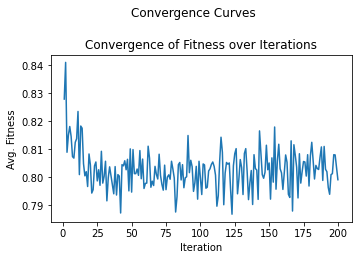

In [23]:
from Py_FS.wrapper.nature_inspired.PSO import PSO as pso
solution = pso(num_agents=30, max_iter=200, train_data=x, train_label=y, save_conv_graph=True)

In [24]:
solution.best_agent

array([0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1.])

In [27]:
for i,v in enumerate(solution.best_agent):
    if v == 1:
        print(x.columns[i],end=', ')

al, su, pc, sc, appet, ane, 

In [26]:
solution.final_fitness

array([0.86197917, 0.84114583, 0.83854167, 0.828125  , 0.828125  ,
       0.828125  , 0.828125  , 0.81770833, 0.81510417, 0.81510417,
       0.8125    , 0.8125    , 0.80729167, 0.8046875 , 0.796875  ,
       0.79427083, 0.79427083, 0.78645833, 0.78645833, 0.78385417,
       0.78385417, 0.78385417, 0.78125   , 0.77864583, 0.77083333,
       0.77083333, 0.76302083, 0.7578125 , 0.75      , 0.75      ])